<a href="https://colab.research.google.com/github/mrinmoyeedeka/Online-Retail-customer-segmentation-Unsupervised-ML/blob/main/Unsupervised_Capstone_Project__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name - Online Retail Customer Segmentation**

**Project Type - Unsupervised**



# **Project Summary -**

We endeavour to find the various customer segments using the online retail store's transaction data obtained from UCI Machine Learning Dataset repository. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The need of customer segmentation:

The differences in customers' behaviour, demographics, geographies, etc. help in classifying them in groups. Learning about different groups in the customer can help with following:

1.Target Marketing

2.Client understanding

3.Optimal product placement

4.Searching for new customers

5.Revenue growth

Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively. These customer segmentation groups can also be used to begin discussions of building a marketing persona. This is because customer segmentation is typically used to inform a brand’s messaging, positioning and to improve how a business sells – so marketing personas need to be closely aligned to those customer segments in order to be effective.

# **Datasets**


**Invoice No:-**	Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:**	Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:**	The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:**Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:**Unit price. Numeric, Product price per unit in sterling.

**CustomerID:**	Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:**	Country name. Nominal, the name of the country where each customer resides.

# **Problem Statement:**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**GIT HUB LINK :** https://github.com/mrinmoyeedeka/Online-Retail-customer-segmentation-Unsupervised-ML

**Let's Begin !**

**Importing Libraries**

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
from datetime import datetime
from datetime import date
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Mounting CSV files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Datasets**

In [ ]:
# Load Dataset
file_path="/content/Online Retail.xlsx - Online Retail.csv"
df= pd.read_csv(file_path)

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# No. of Rows and Columns
df.shape

(541909, 8)

In [ ]:
#Column Info
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

# **Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

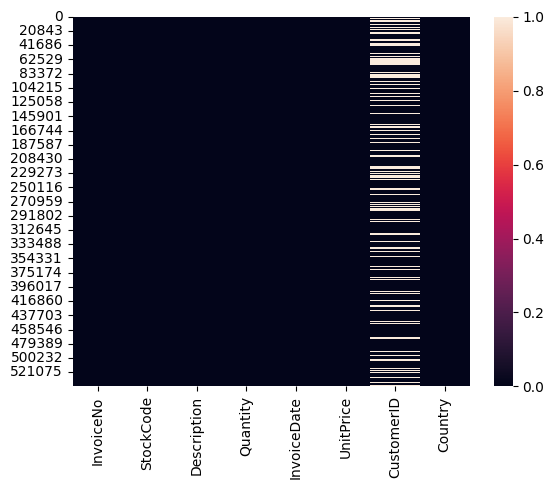

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

In [ ]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

*Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.*

In [ ]:
#checking summary
df.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 22064 .
No. of unique values in  StockCode is 4059 .
No. of unique values in  Description is 4207 .
No. of unique values in  Quantity is 691 .
No. of unique values in  InvoiceDate is 19990 .
No. of unique values in  UnitPrice is 1293 .
No. of unique values in  CustomerID is 4339 .
No. of unique values in  Country is 38 .


**Checking for duplicated values**

In [ ]:
#Return boolean Series denoting duplicate rows
df.duplicated().value_counts()

False    527390
True       5231
dtype: int64

In [ ]:
df[df.duplicated(['InvoiceNo','StockCode'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,12/1/10 9:41,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,12/1/10 11:45,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,12/1/10 11:45,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,12/1/10 11:45,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,12/9/11 11:34,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,12/9/11 11:34,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


In [ ]:
dup = df['InvoiceNo']
df[dup.isin(dup[dup.duplicated()])].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,12/9/11 12:50,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/9/11 12:50,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/11 12:50,3.75,12680.0,France


# **Exploratory Data Analysis**

In [ ]:
# Total  Purchase Count As on country
Total_country=df.Country.value_counts()
Total_country=Total_country.reset_index()
Total_country.columns = ['Country Name', 'Count']
Total_country

,Country Name,Count
0,United Kingdom,487622
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,REGENCY CAKESTAND 3 TIER,2019
3,PARTY BUNTING,1707
4,LUNCH BAG RED RETROSPOT,1594


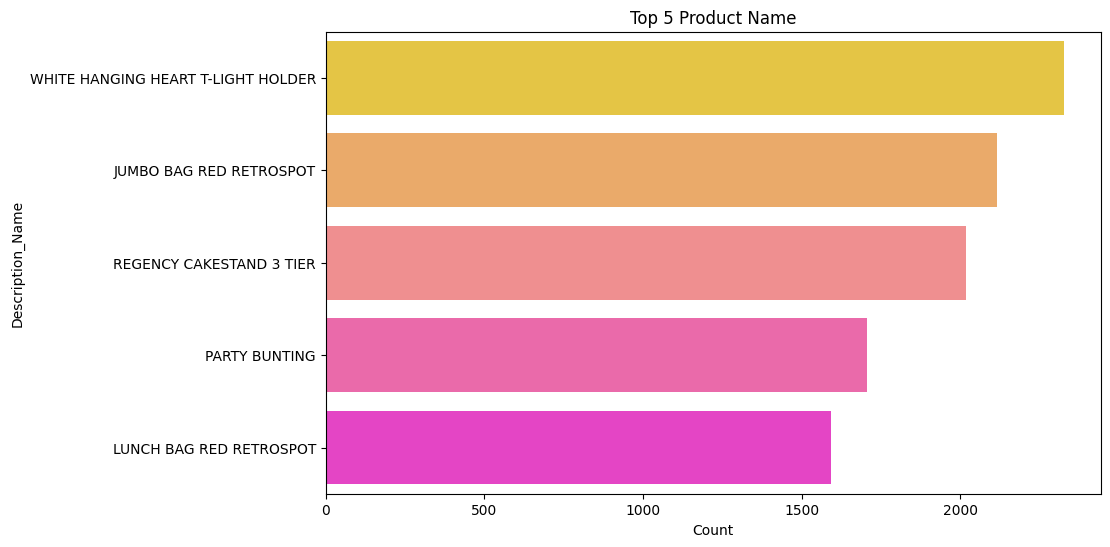

In [ ]:
#plot top 5 product name
plt.figure(figsize=(10,6))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [ ]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

#top 5 country name
country_df.head(10)

,Country_Name,Count
0,United Kingdom,487622
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


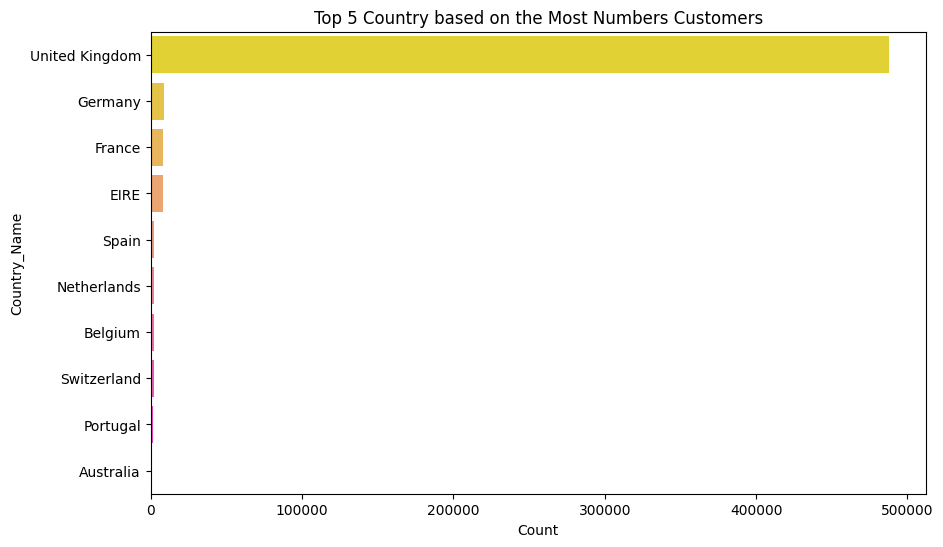

In [ ]:
#plot top 5 country name
plt.figure(figsize=(10,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:10], palette='spring_r');

*From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain*

The UK has purchase total of $4.8 million in items.

In [ ]:
#bottom 5 country name
country_df.tail(10)

,Country_Name,Count
28,Malta,112
29,United Arab Emirates,68
30,European Community,60
31,RSA,58
32,Lebanon,45
33,Lithuania,35
34,Brazil,32
35,Czech Republic,25
36,Bahrain,18
37,Saudi Arabia,9


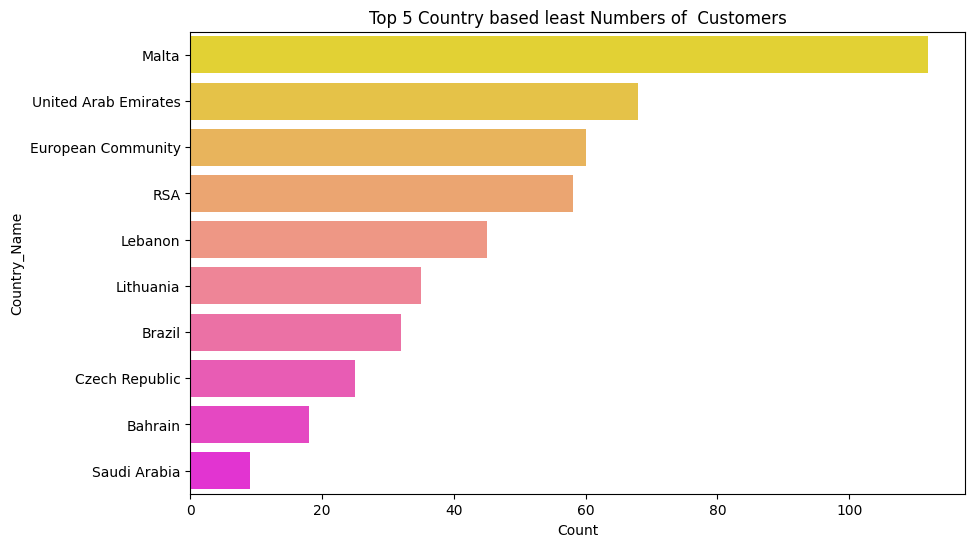

In [ ]:
#plot bottom 5 country name
plt.figure(figsize=(10,6))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-10:], palette='spring_r');

*From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia*

In [ ]:
# Top 10 country from where retail shops earns more
df['Total_sell']=df["Quantity"]*df["UnitPrice"]
Top_earning=df.groupby(['Country'])['Total_sell'].sum()
Top_earning=Top_earning.sort_values(ascending=False).reset_index().head(10)
Top_earning

,Country,Total_sell
0,United Kingdom,9003097.964
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


In [ ]:
# most bought item
Most_bought_item=df.groupby(["Description"]).agg({'Quantity':sum,'Total_sell':sum})
Most_bought_item=Most_bought_item.sort_values( by=['Quantity','Total_sell'], ascending=False).head(5)

# Most_baught_item.sort_values( by=['Quantity','Total_sell'], ascending=False)
Most_bought_item

,Quantity,Total_sell
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047,13841.85
JUMBO BAG RED RETROSPOT,48478,94340.05
WHITE HANGING HEART T-LIGHT HOLDER,37895,106292.77


In [ ]:
# visualization code
fig = px.pie(Total_country, values='Count', names='Country Name',
             title='Number of times order placed by country',
             hover_data=['Country Name'], labels={'Country Name':'Country Name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*   UK has placed maximum order for unique gift items.
*   After UK, Germany placed maximum order for unique gift items.



Axes(0.125,0.11;0.62x0.77)


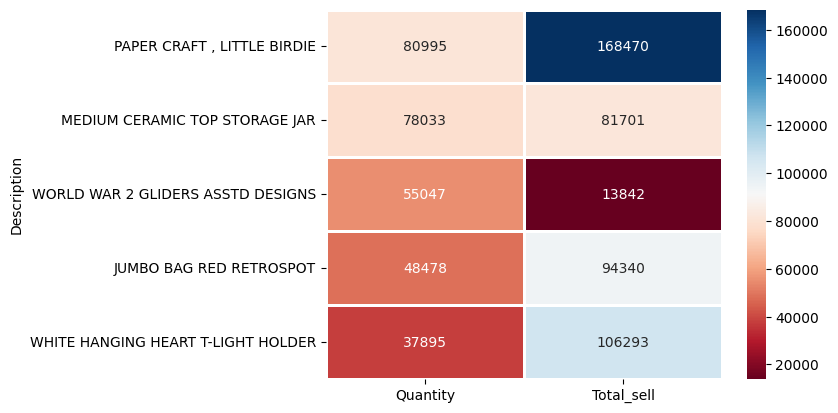

In [ ]:
Most_baught_item=sns.heatmap(Most_bought_item, cmap='RdBu' , annot=True , fmt=".0f",linewidths=1 )
print(Most_baught_item)

*Papercraft, Little birdie is most bought items ever with 168470 quantity.*
*Given insight shows positive impact towards growth.*

In [ ]:
# High revenue generated as on stock code
total_sell_asstockcoed=df.groupby(["StockCode"])['Total_sell'].sum().sort_values(ascending=False).reset_index().head()
total_sell_asstockcoed

,StockCode,Total_sell
0,DOT,206248.77
1,22423,174484.74
2,23843,168469.60
3,85123A,104518.80
4,47566,99504.33


<Figure size 640x480 with 0 Axes>

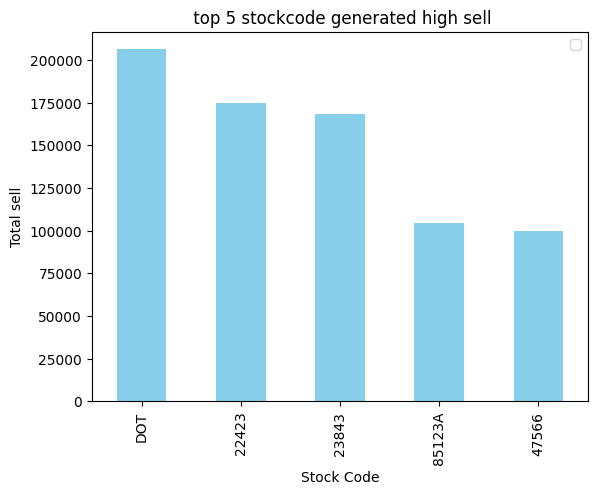

In [ ]:
plt.figure()

total_sell_asstockcoed.plot.bar(x ='StockCode', y='Total_sell', rot=0, color='skyblue')
plt.xlabel('Stock Code')
plt.ylabel('Total sell')
plt.title(' top 5 stockcode generated high sell')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()


*   DOT stock code gift generated a total $ 2,06,245 in revenue.

*   22423 Stock code gift generated a toral $ 1,64,762 in revenue.



<ipython-input-452-1d9bd690b591>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



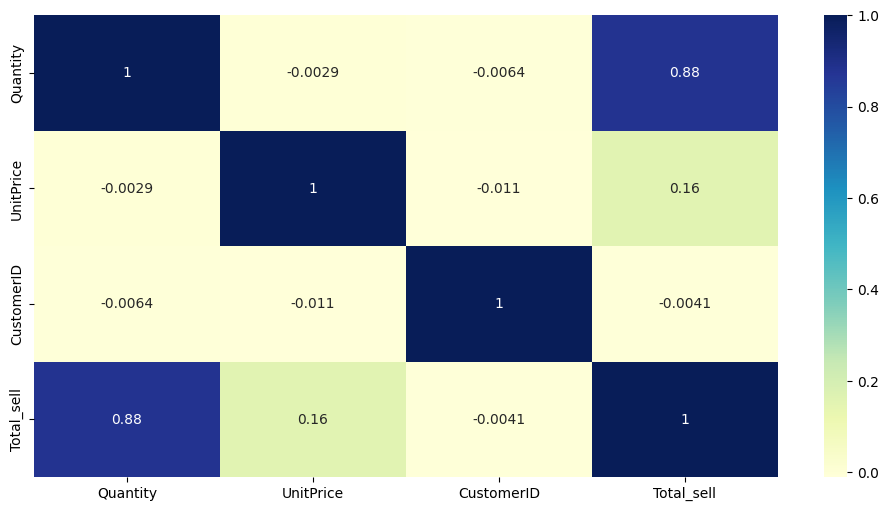

In [ ]:
# Correlation Heatmap visualization code
# plotting co realtion heat map
plt.figure(figsize=(12, 6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.



*   column Quantity is highly co related to total sell columns.




# **Hypothesis Testing**

**1. Is 9 quantity of gift buying across UK region?**

**2. Is 4$ price for each gift product?**

**Hypothetical Statement - 1**

Null Hypothesis: N = 9

Alternate Hypothesis : N < 9

Test Type: Z test

Is 9 quantity of gift buying across UK region?

In [ ]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['Quantity'].mean())
df[['Quantity']].describe()
ztest ,propability_value = stests.ztest(df['Quantity'], x2=None, value=9)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

10.239971762285002
P Value is : 1.4255244363661092e-08
Null hyphothesis rejected , Alternative hyphothesis accepted


Z-Test is used to obtain the P-Value

When the variances are known and the sample size is high, a z-test is a statistical test to assess if two population means are different. A hypothesis test known as a z-test is one in which the z-statistic has a normal distribution. A z-statistic, also known as a z-score, is a numerical representation of the outcome of a z-test.



**Hypothetical Statement - 2**

Null Hypothesis: N = 4

Alternate Hypothesis : N < 4

Test Type: Z test

Is 4$ price for each gift product?

In [ ]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['UnitPrice'].mean())
df[['UnitPrice']].describe()
ztest ,propability_value = stests.ztest(df['UnitPrice'], x2=None, value=4)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

3.847620829820829
P Value is : 0.007741403784879614
Null hyphothesis rejected , Alternative hyphothesis accepted


Z-Test is used to obtain the P-Value

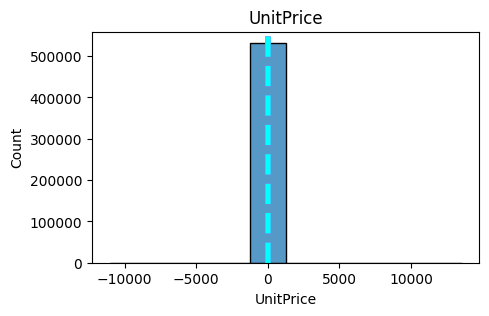

In [ ]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['UnitPrice'])
sns.histplot(df['UnitPrice'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('UnitPrice')
plt.show()

**Hypothetical Statement - 3**

Null Hypothesis: N = 17

Alternate Hypothesis : N < 17

Test Type: Z test

Is total sell of unique product is 17?

In [ ]:
# Perform Statistical Test to obtain P-Value
print(df['Total_sell'].mean())
df[['Total_sell']].describe()
ztest ,propability_value = stests.ztest(df['Total_sell'], x2=None, value=16)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

19.985243585964508
P Value is : 5.975501166006881e-27
Null hyphothesis rejected , Alternative hyphothesis accepted


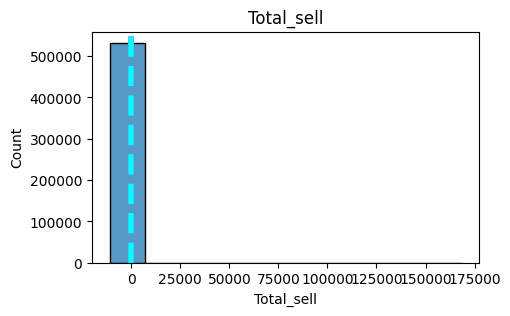

In [ ]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['Total_sell'])
sns.histplot(df['Total_sell'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('Total_sell')
plt.show()

# **Distribution of Quantity**

<ipython-input-458-2a5ff41a442d>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




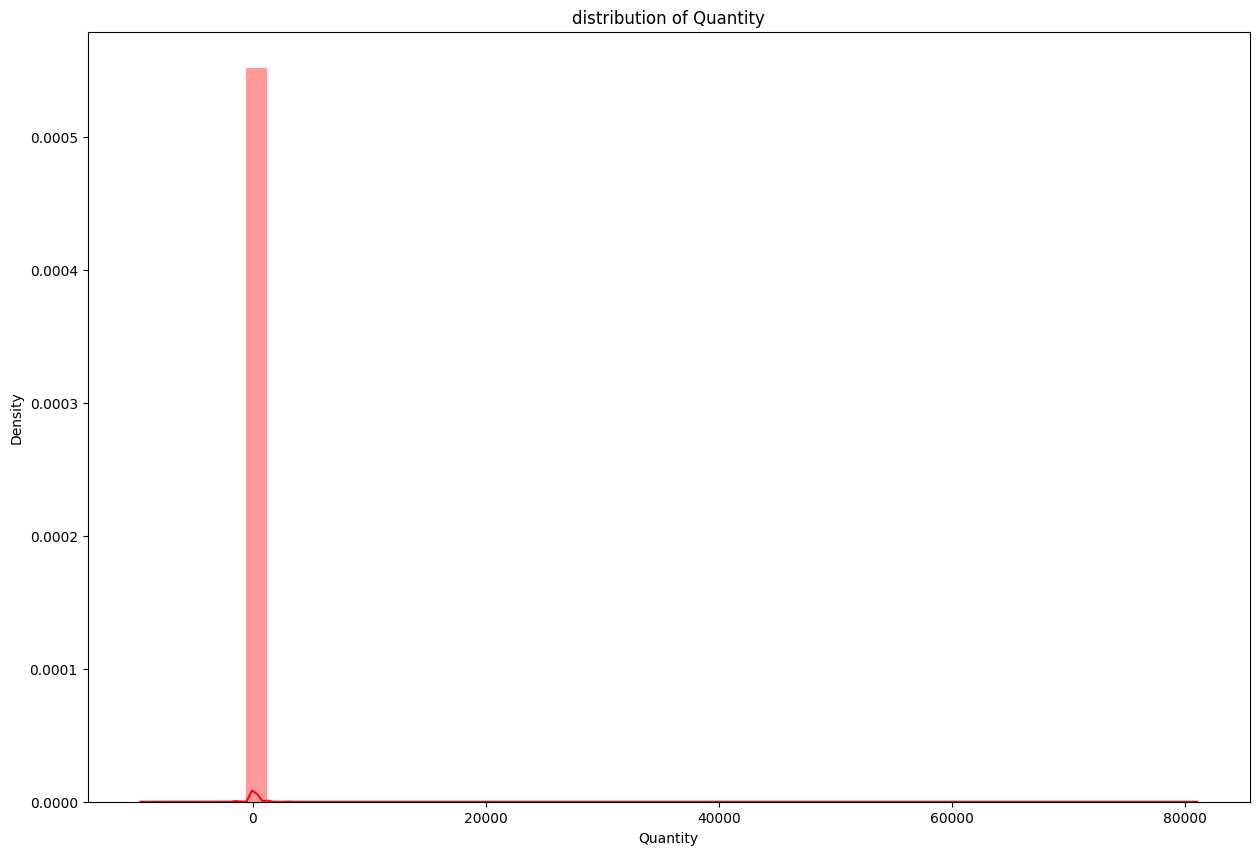

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

*Here we can see that its a staright line distribution.*



/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log

<ipython-input-459-643bf52194d8>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




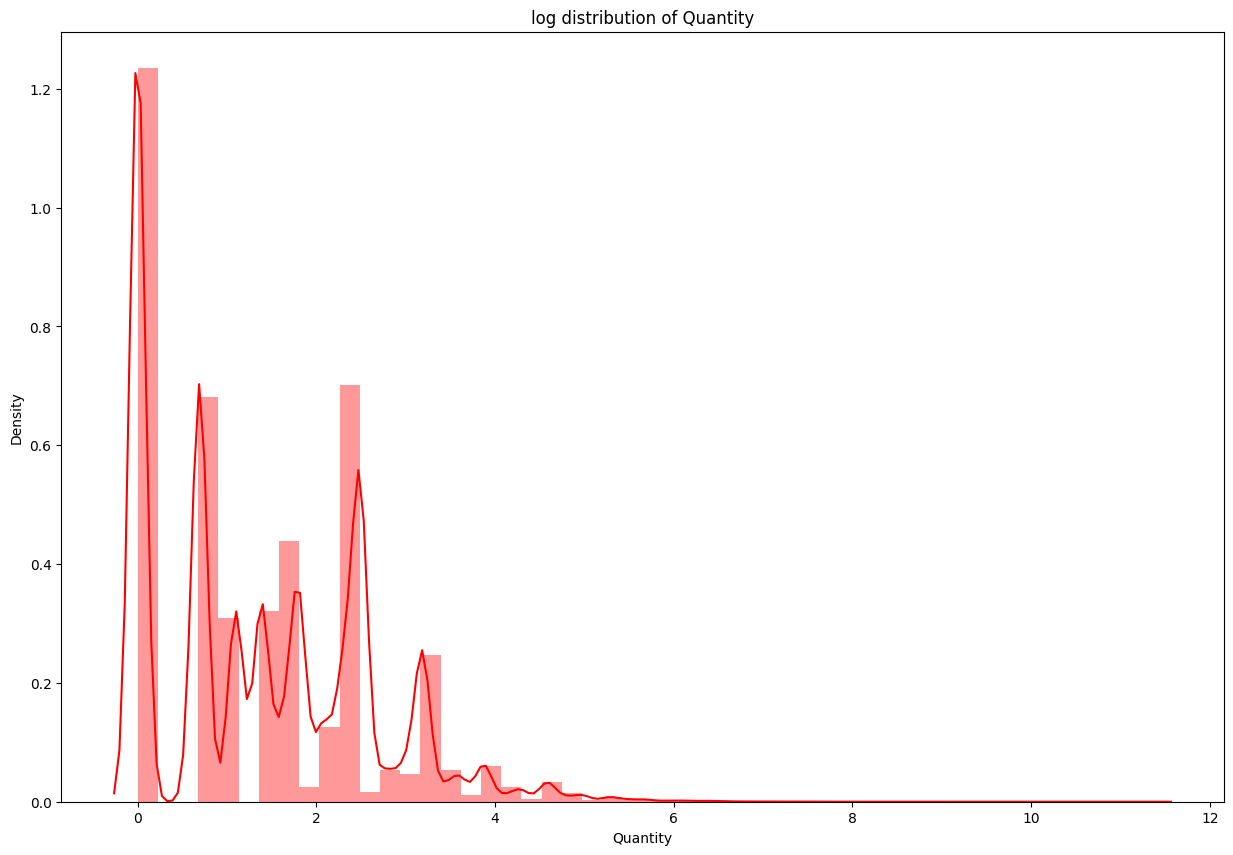

In [ ]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

# **Distribution of Unit Price**

<ipython-input-460-0aa381a796a5>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

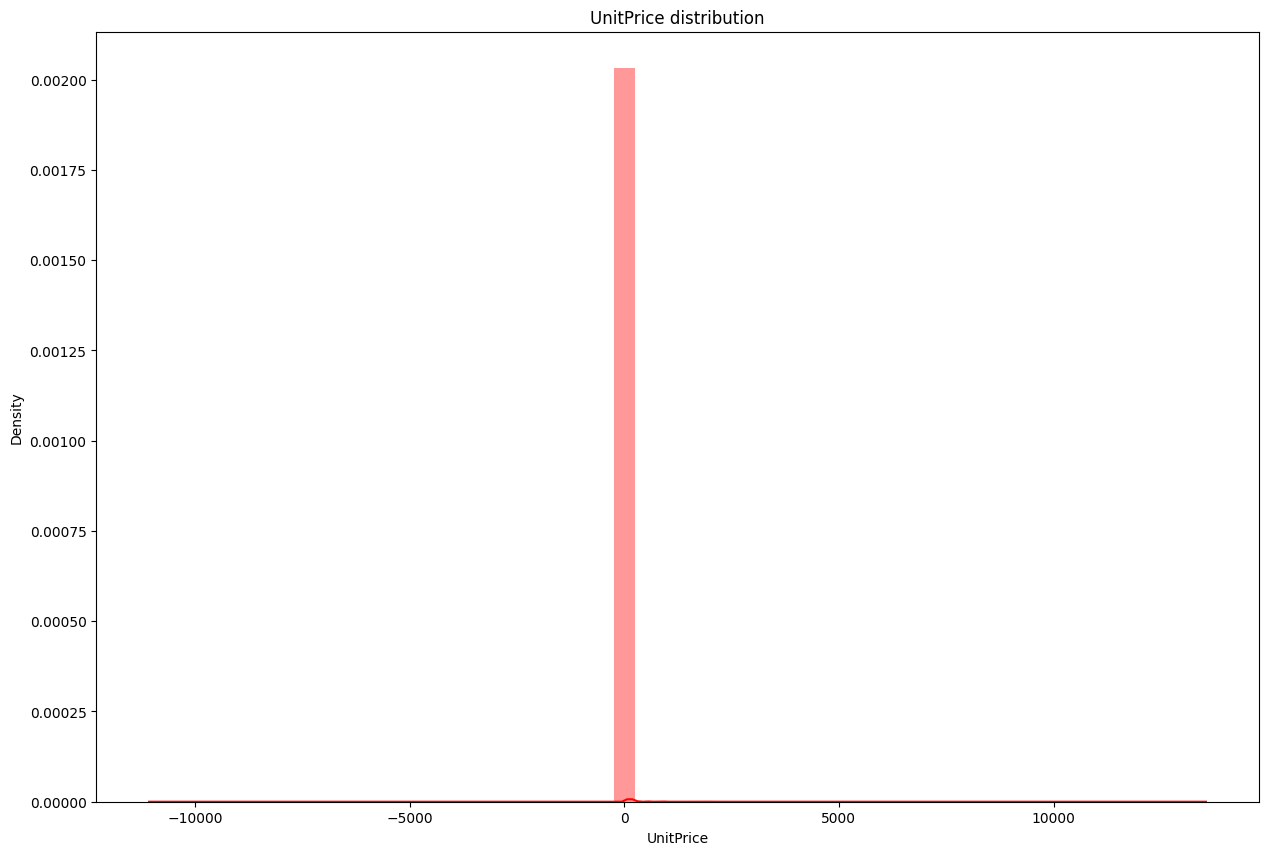

In [ ]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

*From the distribution of unit price, we can say that most items have a lower price range.*

In [ ]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom,-11062.06


* Here we found out that there two invoice numbers with description of adjust bad depth which was not paid by the customer

# **Feature Engineering & Data Pre-processing**

**Handling Missing Values**

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
Total_sell          0
dtype: int64


<Axes: >

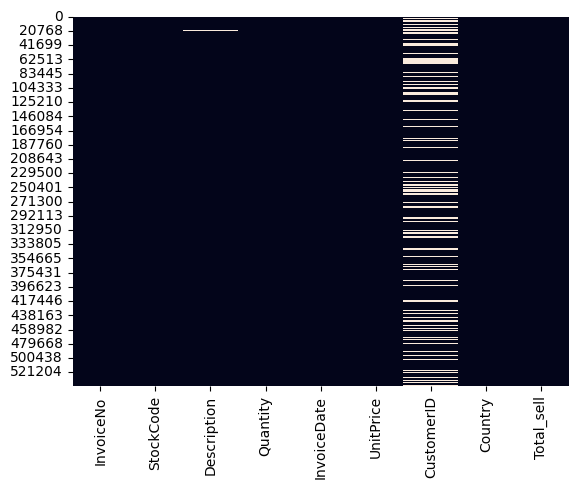

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# droping all rows having missing values
df = df.dropna()
df.shape

(397924, 9)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


*we have removed columns which have most missing values.*

In [ ]:
print(df['InvoiceDate'].dtype)

object


* Data type of Invoice date should be in datetime.

In [ ]:
#we use the to_datetime() function with the errors='coerce' option to convert the "InvoiceDate" column to datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [ ]:
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [ ]:
#Converting InvoiceDate columns into date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [ ]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell,Month,Day,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,20.34


**Months**

In [ ]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


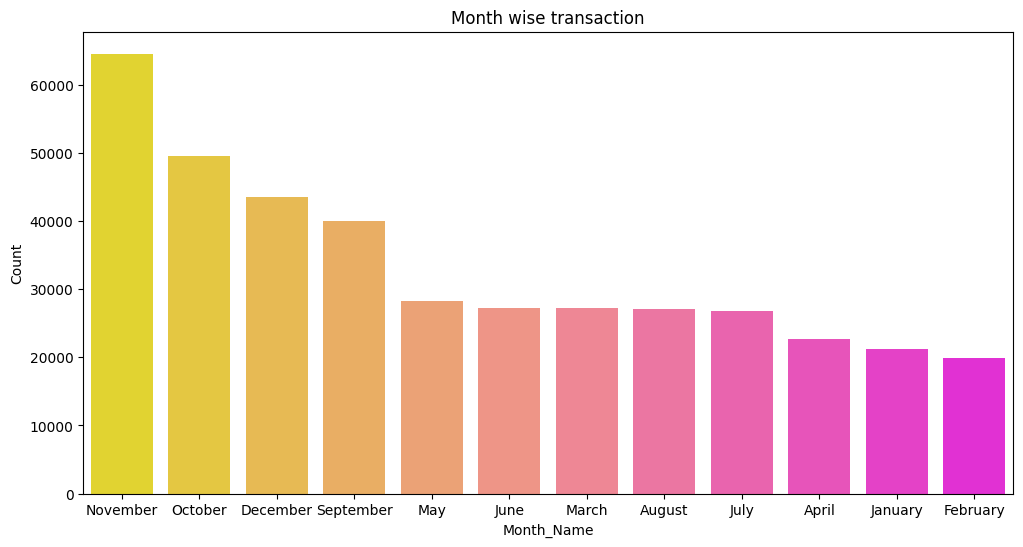

In [ ]:
#plotting for month
plt.figure(figsize=(12,6))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

♦ *Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.*

♦ *Least numbers of purchasing are in the month of April and February.*

**Days**

In [ ]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


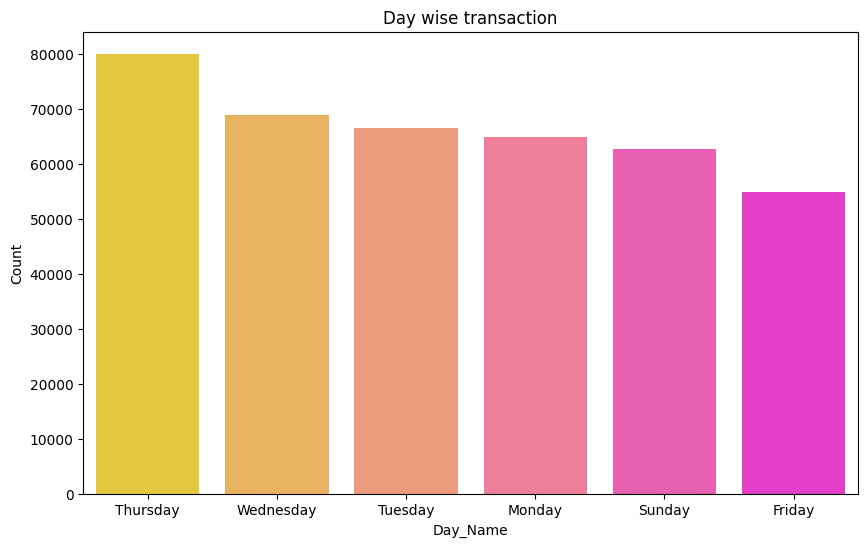

In [ ]:
#plotting for days
plt.figure(figsize=(10,6))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.

**Hour**

In [ ]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


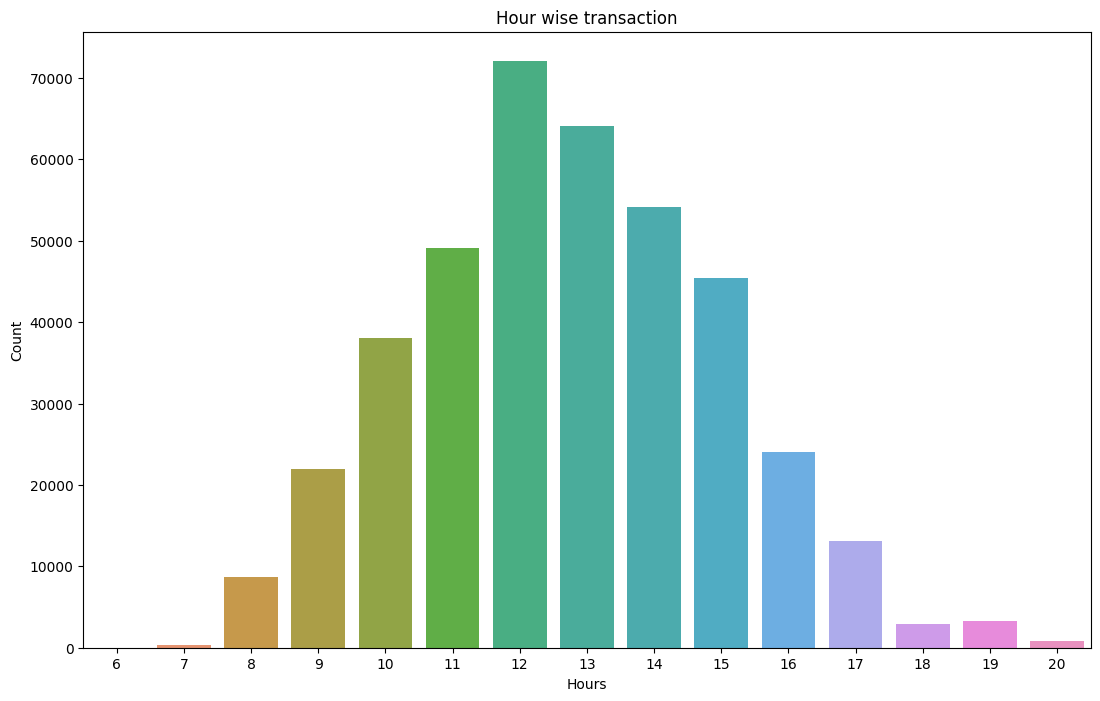

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12hours clock to 13hours.**

# **RFM model (Recency, Frequency,Monetary value)**

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.
RFM stands for the three dimensions:

**Recency** – How recently did the customer purchase?

**Frequency** – How often do they purchase?

**Monetary** – How much do they spend?

**Recency** - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

**Frequency** - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

**Monetary** - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

<ipython-input-481-2838e11ddc0a>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




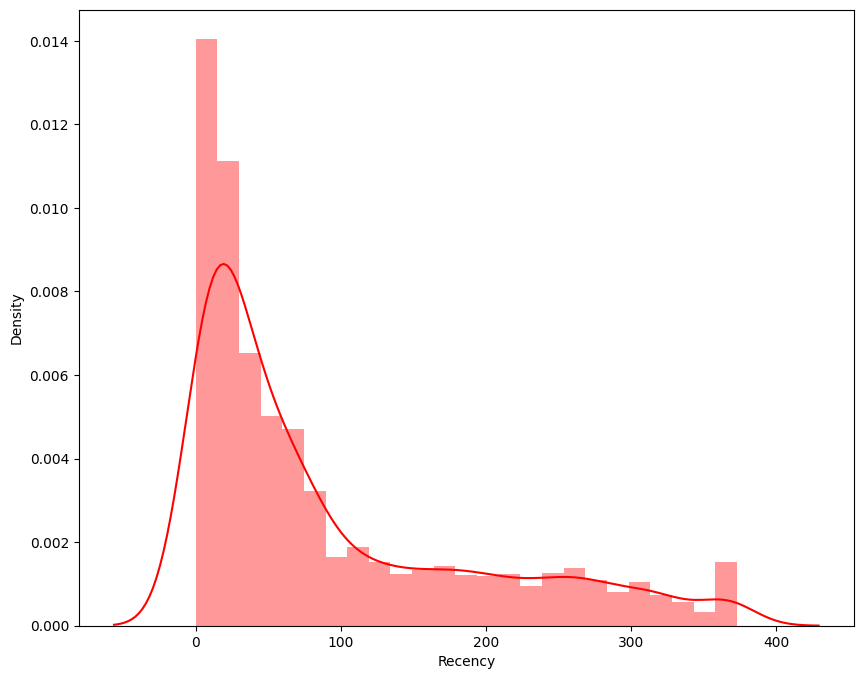

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
# total revenue generated
# monetary
total_revenue = df.groupby('CustomerID')['Total_sell'].sum()
total_revenue = total_revenue.reset_index()
total_revenue.head()

,CustomerID,Total_sell
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

<ipython-input-484-db38a3d4cb88>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Monetary', ylabel='Density'>

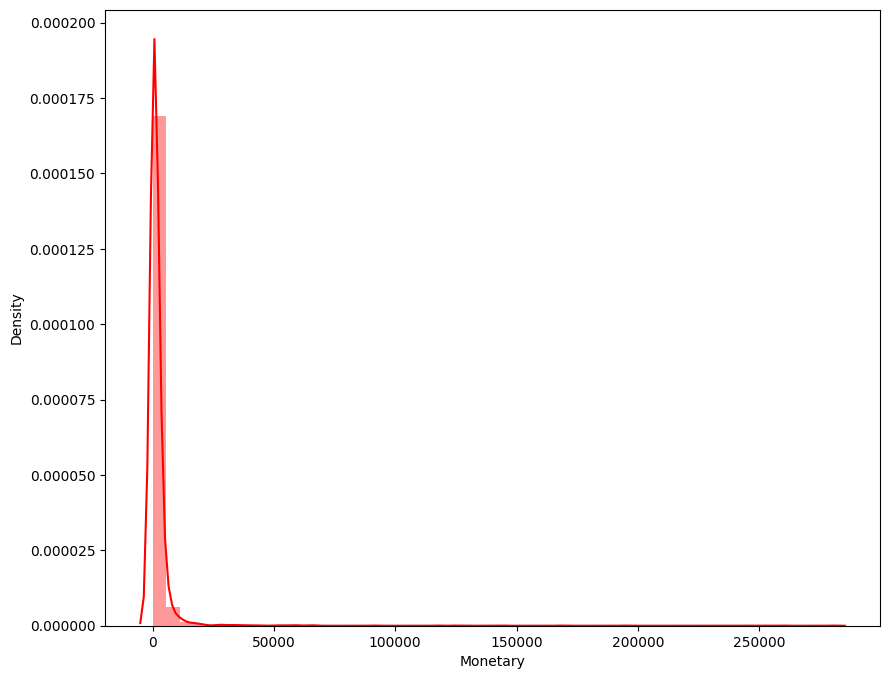

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

***From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.***

# **Splitting into four segments using quantiles.**


In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **Clustering**
**K-Means Clustering:**

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

**Silhouette score method:**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters

# **Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.42101990904679115


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.34287795699549684


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.3645300274267199


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.3363913997680339


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.3437431197188888


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.3393592536109827


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.3356287964382151


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, silhouette score is 0.34548972944786394


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 10, silhouette score is 0.34824775514992473


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 11, silhouette score is 0.33700713230043683


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 12, silhouette score is 0.34155989149382016


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 13, silhouette score is 0.3394178614017768


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 14, silhouette score is 0.3396304065468686


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 15, silhouette score is 0.34028116054829194


# **Elbow Method:**

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

**Applying Elbow Method on Recency and Monetary**


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

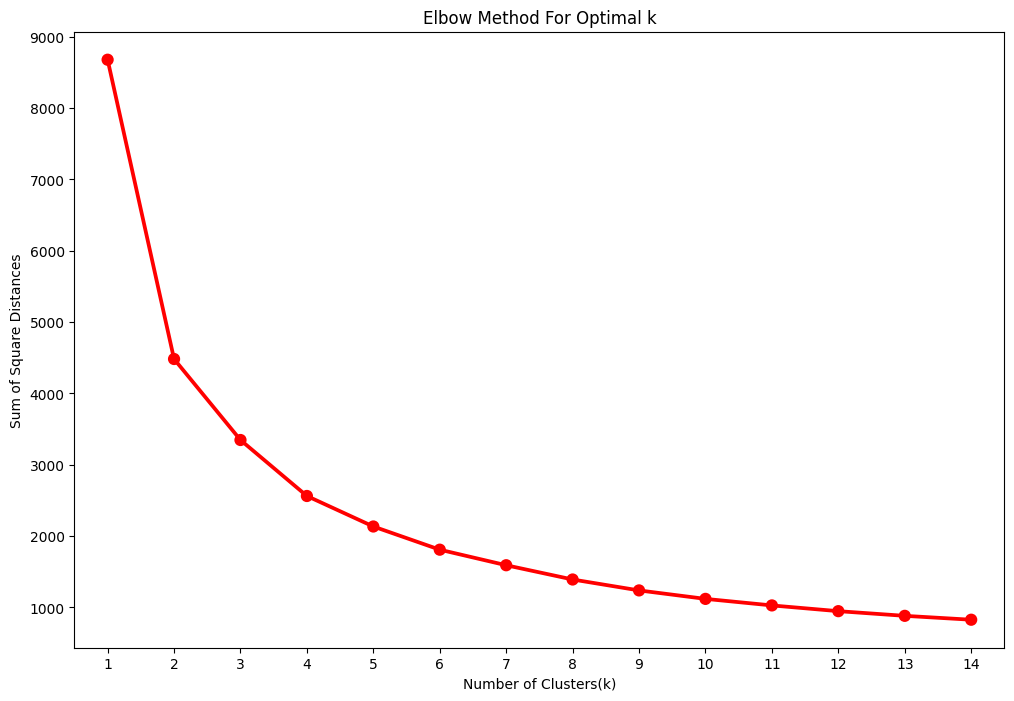

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



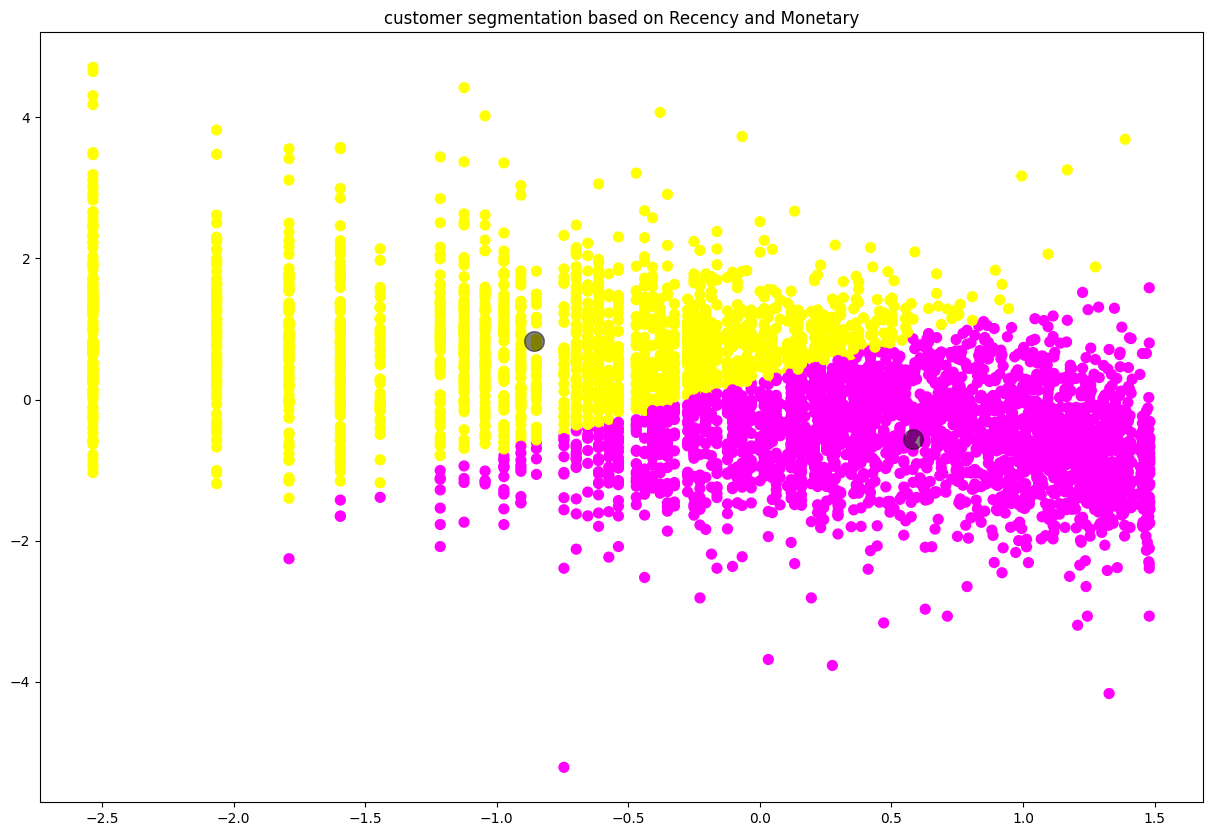

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

*Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.*

# **DBSCAN Clustering:**
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

**Applying DBSCAN on Recency and Monetary**

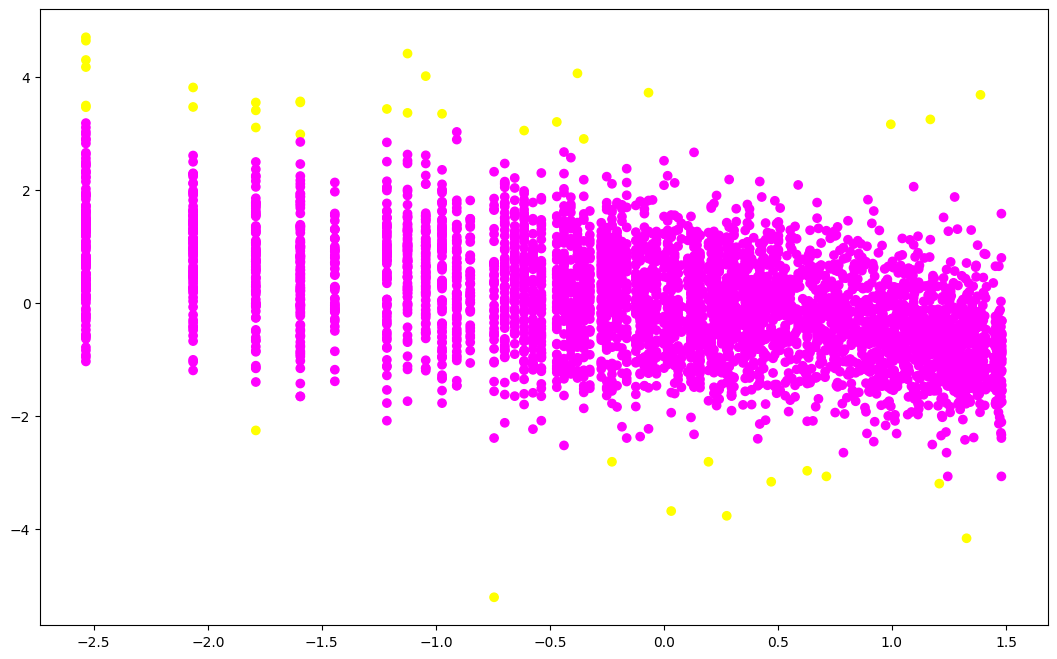

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

*Here we can see that, Customers are separated when we cluster them by Recency and Monetary.*

# **Applying silhouette Score Method on Frquency and Monetary**

In [ ]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2, silhouette score is 0.47827294807239146


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3, silhouette score is 0.407400185453352


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4, silhouette score is 0.3720876849377642


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 5, silhouette score is 0.3454258439303477


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6, silhouette score is 0.3600808003806281


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 7, silhouette score is 0.3385833847513187


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8, silhouette score is 0.3494371456101899


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, silhouette score is 0.343221842853126


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 10, silhouette score is 0.3589586514188199


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 11, silhouette score is 0.3694798934788401


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 12, silhouette score is 0.35318788716877153


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 13, silhouette score is 0.36202408659542945


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 14, silhouette score is 0.3518110337010951


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 15, silhouette score is 0.36178241123595417


# **Applying Elbow Method on Frequency and Monetary**


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

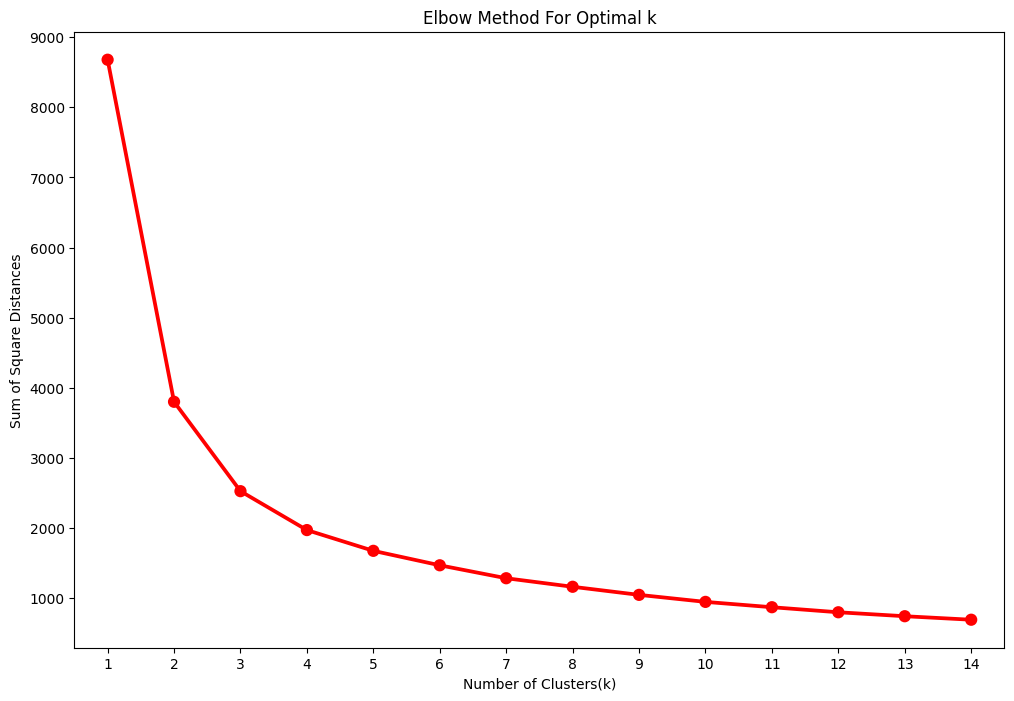

In [ ]:
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



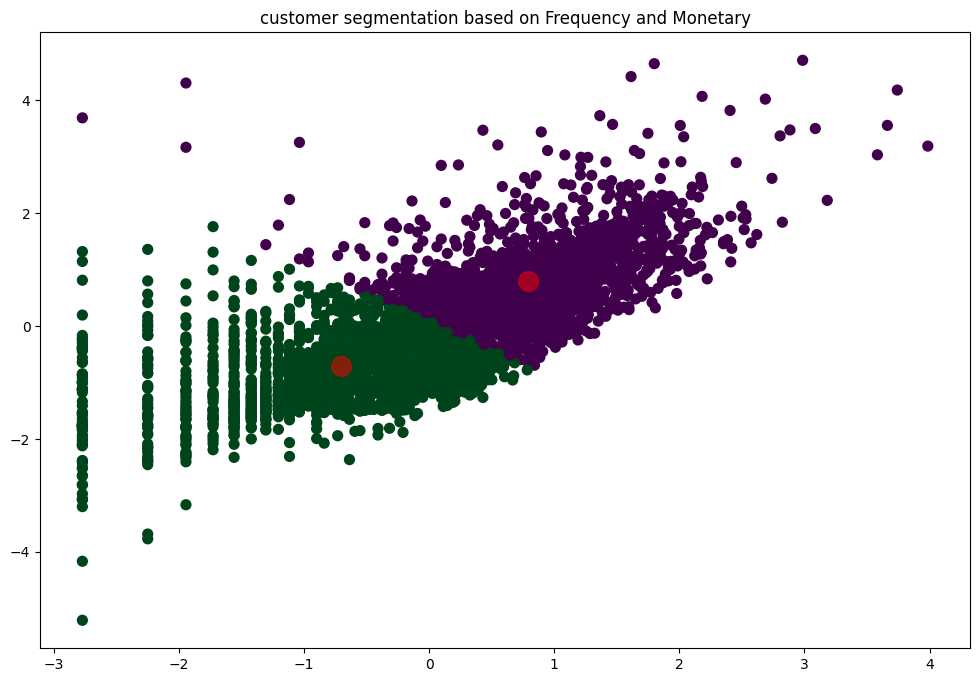

In [ ]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(12,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

♦ *Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.*



# **Applying DBSCAN to Method on Frquency and Monetary**


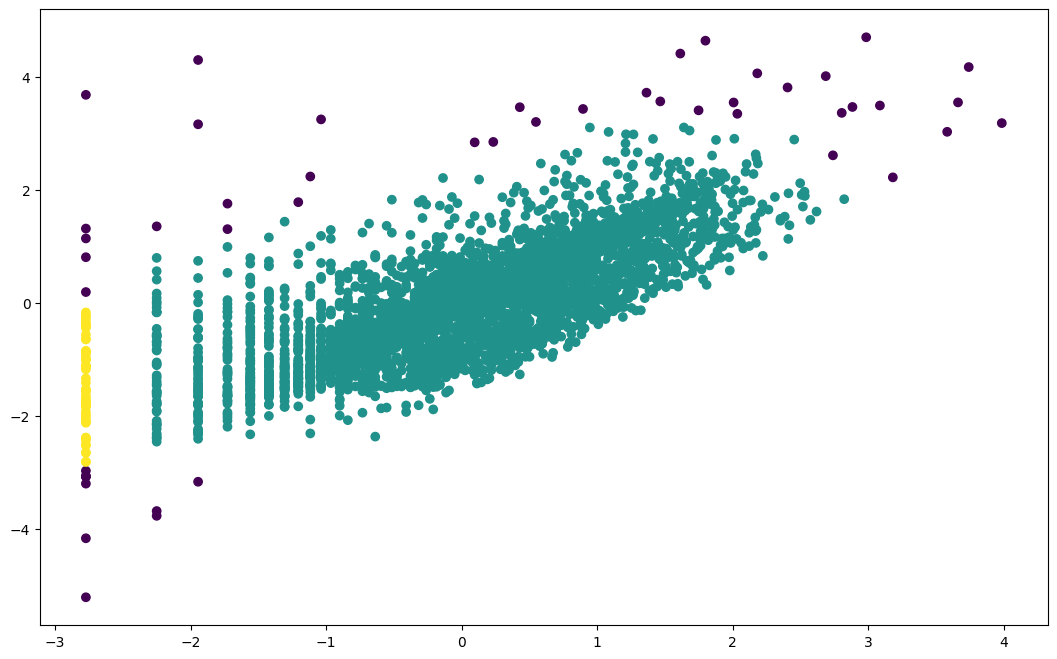

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);


In [ ]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



*From the elbow method, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.*

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,0


In [ ]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18263.0,25,61,1213.16,2,2,2,222,6,3.218876,4.110874,7.100984,1
18265.0,72,46,801.51,3,2,2,322,7,4.276666,3.828641,6.686497,1
18272.0,2,166,3078.58,1,1,1,111,3,0.693147,5.111988,8.032224,1


# **Here, we can see No. of Clusters = 2**


In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

,Recency,Frequency,Monetary
Cluster,,,
0,132.091187,21.915794,386.536262
1,47.215437,169.854910,3920.599801


In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
+--------+--------------------------------+------+---------------------------+


# **Conclusion**

***White Hanging heat T-Light holder is the most demanding gift of all.***

***Lunch bag black skull is the least demanding gift of all.***

***The UK has to purchase a total of $4.2 million in gift items.*** 

***After the UK, Germany placed maximum orders for unique gift items.***

***The Netherlands has purchased a total of $200 k gift items.***

***Online retail gift shop generates $ 8 + million in revenue from the UK only.***

***This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.***

***By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.***

**The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.**

